### Seaborn Docs

In [2]:
import seaborn as sns
import random
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


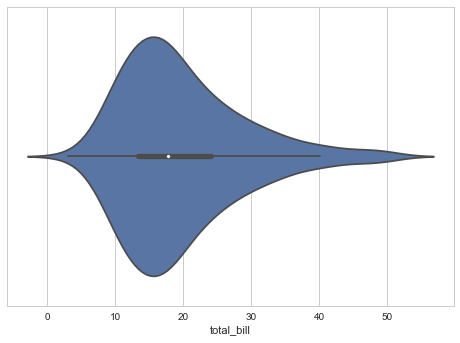

In [4]:
ax = sns.violinplot(x=tips["total_bill"])

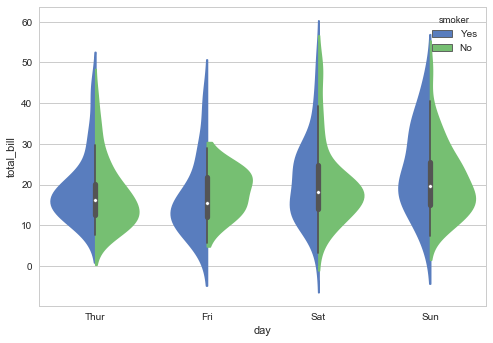

In [5]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted", split=True)

### Randomly Populated Trade DataFrame (Format Original)

In [6]:
import pandas as pd
import numpy as np
num_trades = 10000
week_days = ["Mon","Tues","Wed","Thurs","Fri"]
d = {"Trade Id"  : list(range(0,num_trades)),
     "A" : np.random.normal(10,2,num_trades),
     "B" : np.random.uniform(5,20,num_trades),
     "C" : np.random.uniform(0,5,num_trades),
     "Error Hit": np.random.choice([0,1],num_trades),
     "Week Day" : np.random.choice(week_days,num_trades)
    }
df_trade = pd.DataFrame(d)
cols = ["Trade Id", "A","B","C","Error Hit","Week Day"]
df_trade = df_trade[cols]
df_trade.head(5)

,Trade Id,A,B,C,Error Hit,Week Day
0,0,9.021346,19.249621,1.227433,0,Tues
1,1,8.533593,10.546775,3.194912,0,Tues
2,2,9.212579,7.703136,0.920214,0,Tues
3,3,14.204490,17.893591,0.268325,1,Wed
4,4,8.956024,16.802372,2.033645,0,Tues


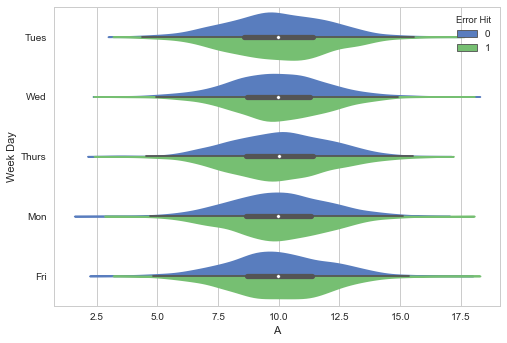

In [7]:
ax = sns.violinplot(y = "Week Day", x = "A", hue="Error Hit", data=df_trade, palette="muted", split=True)

### Randomly Populated Trade DataFrame (Violin plot format)

In [8]:
num_rows = 1000
num_trades = 333 # roughly 3 statuses for each trade
status = ["A","B","C"]
d = {"Trade Id"       : np.random.choice(list(range(0,num_trades)),num_rows),
     "Time in Status" : np.random.uniform(5,20,num_rows),
     "Status"         : np.random.choice(status,num_rows),
    }
df_trade_pivoted = pd.DataFrame(d)
cols = ["Trade Id","Time in Status","Status"]
df_trade_pivoted = df_trade_pivoted[cols]
df_trade_pivoted["Errors"] = df_trade_pivoted["Trade Id"]%2
df_trade_pivoted.sort_values(by=['Trade Id'], inplace = True)
df_trade_pivoted.head(15)

,Trade Id,Time in Status,Status,Errors
796,1,17.791662,C,1
274,2,10.852475,C,0
913,2,11.694759,A,0
273,2,15.220606,C,0
535,3,15.935714,C,1
930,3,19.206699,A,1
893,3,9.049728,C,1
215,3,14.727465,A,1
75,4,19.234762,A,0
762,4,18.141266,B,0


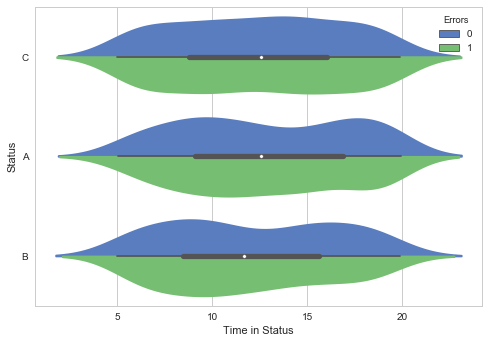

In [9]:
ax = sns.violinplot(y = "Status", x = "Time in Status", hue="Errors", data=df_trade_pivoted, palette="muted", split=True)

### Pivoting from Original Table format to Violin Format

In [10]:
melted = pd.melt(df_trade.drop('Week Day', 1),id_vars=["Trade Id", "Error Hit"], var_name = "Status", value_name="Time (s)")
melted.sort_values(by=['Trade Id'], inplace = True)
melted.head()

,Trade Id,Error Hit,Status,Time (s)
0,0,0,A,9.021346
20000,0,0,C,1.227433
10000,0,0,B,19.249621
1,1,0,A,8.533593
20001,1,0,C,3.194912


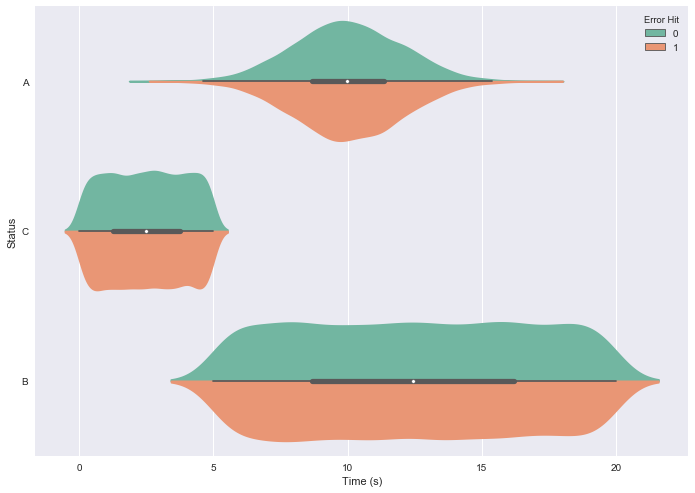

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(y = "Status", x = "Time (s)", hue="Error Hit", data=melted, palette="Set2", split=True, gridsize=500,)

### Artifically Injecting Longer Times for Errored Trades

In [12]:
def artificially_inflate_error(row):
    if all([row['Error Hit']==1,row['Status']=="C"]):
        rv = random.uniform(2,2.5) + row['Time (s)'] * random.uniform(1,1.5)
    else:
        rv = row['Time (s)']
    return rv

melted['Artifical Time'] = melted.apply(artificially_inflate_error, axis = 1)
melted.head()

,Trade Id,Error Hit,Status,Time (s),Artifical Time
0,0,0,A,9.021346,9.021346
20000,0,0,C,1.227433,1.227433
10000,0,0,B,19.249621,19.249621
1,1,0,A,8.533593,8.533593
20001,1,0,C,3.194912,3.194912


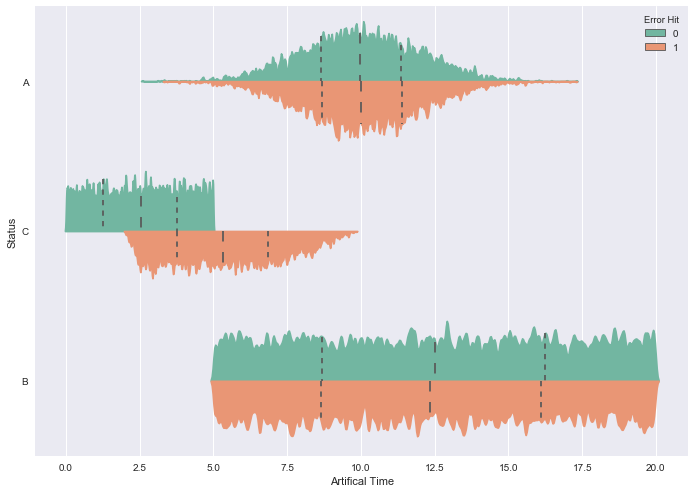

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(y = "Status", x = "Artifical Time", hue="Error Hit", data=melted,
                    palette="Set2", split=True, gridsize=500, scale="area", inner="quartile", bw=0.01)